## vis GT SG envmap

(3, 106, 160, 8, 16) 14059.204
(22, 8, 16, 16, 3)


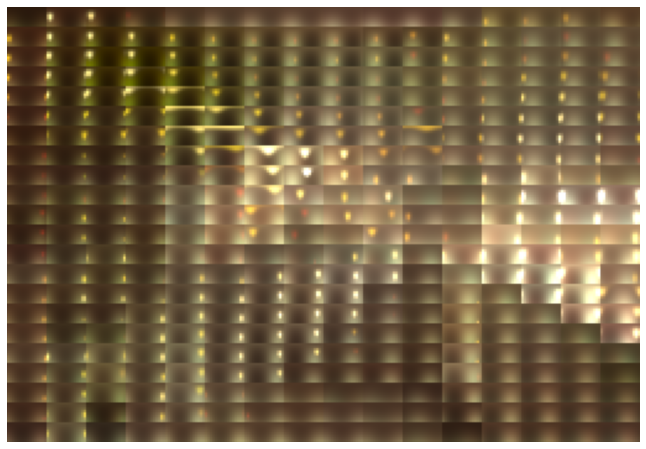

In [76]:
from pathlib import Path
%reload_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pickle
import matplotlib.pyplot as plt


# root_path = Path('/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/DatasetCreation/')
# env_path = root_path / meta_split / scene_name / ('imenv_%d.hdr'%withinsequence_id)
## OR
# 1, 18
# env_path = '/newfoundland/ruizhu/Summary_vis_20210831/20211115-185557--DATE-eval_OR_BRDF-BS-light_MODEL_ALL_loadBRDFoffline_scaleInv_20211114-183846/945000-18_light_GT_ori.pickle'
# multi
# env_path = '/newfoundland/ruizhu/Summary_vis_20210831/20211115-192813--DATE-eval_mm1_OR_ModelALL_lighting-DPTBRDFscaleInv-BS_20211114-183846/945000-1_light_GT_ori.pickle'

## real images
# 4, 18

# single
# env_path = '/newfoundland/ruizhu/Summary_vis_20210831/20211115-154256--DATE-eval_BRDF-BS-light_MODEL_ALL_loadBRDFoffline_scaleInv_20211114-183846/925000-8_light_Pred_ori.pickle'

# Zhengqin
# env_path = '/newfoundland/ruizhu/Summary_vis_20210831/20211115-173442--DATE-eval_mm1_real_Zhengqin_BRDFLight_afterBS/0-9_light_Pred_ori.pickle'
env_path = '/newfoundland/ruizhu/Summary_vis_20210831/20211116-141352--DATE-eval_mm1_real_Zhengqin_BRDFLight_afterBS/0-9_light_Pred_ori.pickle'

# Multi
# env_path = '/newfoundland/ruizhu/Summary_vis_20210831/20211115-174621--DATE-eval_mm1_real_ModelALL_lighting-DPTBRDFscaleInv-BS_20211114-183846/945000-9_light_Pred_ori.pickle'

env_path = env_path.replace('GT', 'Pred_Scaled')

import os.path as osp
import numpy as np
import cv2
from skimage.measure import block_reduce 

envHeight = 8
envWidth = 16
envRow = 120
envCol = 160
SGNum = 12

with open(env_path, 'rb') as f:
    env_dict = pickle.load(f)
envmaps_GT = env_dict['env']
print(envmaps_GT.shape, np.amax(envmaps_GT))
envmaps_GT = envmaps_GT[[2, 1, 0], :, :, :, :]

# envmaps_GT = envmaps_GT / 2.
envmaps_GT = envmaps_GT / 2000.

H_grid, W_grid, h, w = envmaps_GT.shape[1:]
downsize_ratio = [5, 10]
# downsize_ratio = [1, 2]

# assert H_grid % downsize_ratio[0] == 0
# assert W_grid % downsize_ratio[1] == 0
xx, yy = np.meshgrid(np.arange(0, H_grid, downsize_ratio[0]), np.arange(0, W_grid, downsize_ratio[1]))
a = envmaps_GT[:, xx.T, yy.T, :, :]
a = np.clip(a**(1.0/2.2), 0., 1.)

print(a.transpose(1, 3, 2, 4, 0).shape)
# b = a.transpose(1, 3, 2, 4, 0).reshape(H_grid*h//downsize_ratio[0], W_grid*w//downsize_ratio[1], 3)
b = a.transpose(1, 3, 2, 4, 0)
b = b.reshape(b.shape[0]*b.shape[1], b.shape[2]*b.shape[3], 3)

plt.figure(figsize=(15, 8))
plt.box(False)

plt.imshow(b)
plt.axis('off')
plt.show()

from PIL import Image
im = Image.fromarray((b*255.).astype(np.uint8))
im.save("/home/ruizhu/Downloads/a.png")

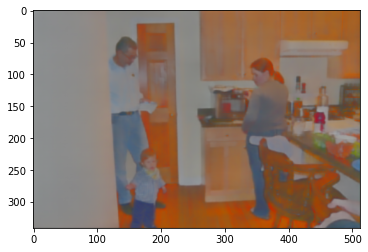

In [72]:
import h5py
imName = '../third_parties_outside/CGIntrinsics/69896.png.h5'
hf = h5py.File(imName, 'r')
im = np.array(hf.get('prediction' )['R'] )
im.shape

plt.figure()
plt.imshow(im)
plt.show()

im = Image.fromarray((im*255.).astype(np.uint8))
im.save("/home/ruizhu/Downloads/aa.png")


In [61]:
hf.keys()

<KeysViewHDF5 ['prediction']>